# PART A

In [26]:
import pandas as pd
df = pd.read_csv("Lab2_dataset (1).csv")

In [27]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with desired parameters
vectorizer = CountVectorizer(max_features=5)  

# Fit and transform the text data
text_vectorized = vectorizer.fit_transform(df['text']) 
# Print the shape of the resulting vectorized data
print("Shape of vectorized data:", text_vectorized.shape)


Shape of vectorized data: (5171, 5)


In [8]:
from sklearn.model_selection import train_test_split

X = text_vectorized
y = df['label_num']  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the resulting sets
print("Training set shape (features):", X_train.shape)
print("Training set shape (labels):", y_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Testing set shape (labels):", y_test.shape)


Training set shape (features): (4136, 5)
Training set shape (labels): (4136,)
Testing set shape (features): (1035, 5)
Testing set shape (labels): (1035,)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7661835748792271
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       742
           1       0.60      0.51      0.55       293

    accuracy                           0.77      1035
   macro avg       0.71      0.69      0.70      1035
weighted avg       0.76      0.77      0.76      1035



              precision    recall  f1-score   support

           0       0.82      0.87      0.84       742
           1       0.60      0.51      0.55       293

    accuracy                           0.77      1035
   macro avg       0.71      0.69      0.70      1035
weighted avg       0.76      0.77      0.76      1035


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Convert sparse matrix to dense array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_dense, y_train)

# Predict on the test data
y_pred_gnb = gnb.predict(X_test_dense)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", accuracy_gnb)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gnb))


Accuracy: 0.4647342995169082
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.25      0.41       742
           1       0.35      1.00      0.51       293

    accuracy                           0.46      1035
   macro avg       0.67      0.63      0.46      1035
weighted avg       0.81      0.46      0.44      1035



              precision    recall  f1-score   support

           0       0.99      0.25      0.41       742
           1       0.35      1.00      0.51       293

    accuracy                           0.46      1035
   macro avg       0.67      0.63      0.46      1035
weighted avg       0.81      0.46      0.44      1035


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)

print("Multinomial Naive Bayes Classifier Performance:")
print("Accuracy:", nb_accuracy)
print("Classification Report:")
print(nb_classification_report)


Multinomial Naive Bayes Classifier Performance:
Accuracy: 0.58743961352657
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       742
           1       0.35      0.51      0.41       293

    accuracy                           0.59      1035
   macro avg       0.55      0.56      0.55      1035
weighted avg       0.64      0.59      0.61      1035



              precision    recall  f1-score   support

           0       0.76      0.62      0.68       742
           1       0.35      0.51      0.41       293

    accuracy                           0.59      1035
   macro avg       0.55      0.56      0.55      1035
weighted avg       0.64      0.59      0.61      1035


# Comaprison etween the models

### The low performance of the Naive Bayes models can be attributed to their underlying assumptions. 
### RandomForestClassifier tends to perform better when there are complex relationships between features and the target variable, while Naive Bayes classifiers are simpler models that might perform well under certain assumptions about the data distribution.






# PART B

In [17]:
df = pd.read_csv("AB_NYC_2019 (1).csv")
df.head(5)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


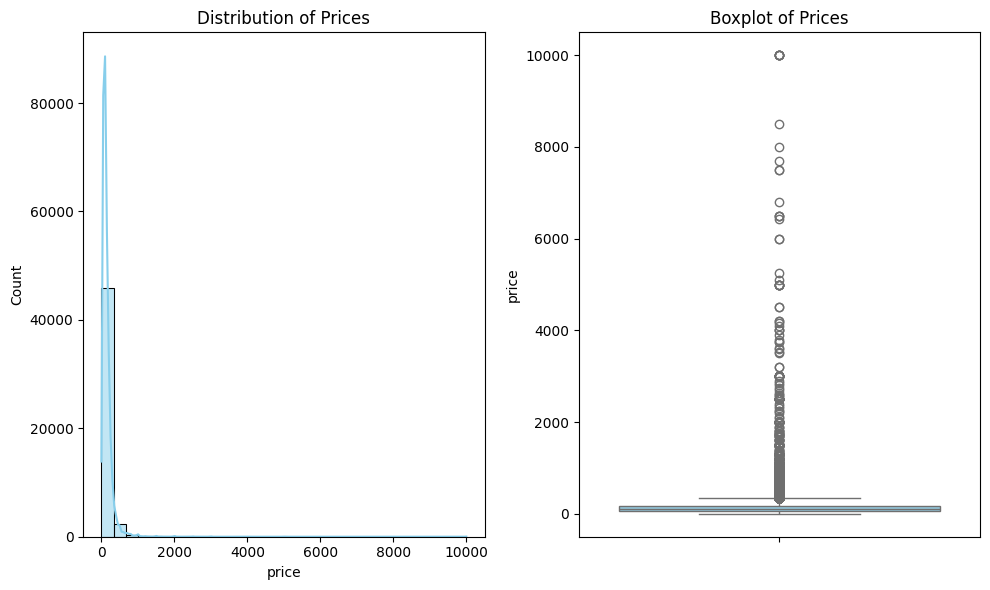

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot histogram of prices
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices')

# Plot boxplot of prices
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='price', color='skyblue')
plt.title('Boxplot of Prices')

plt.tight_layout()
plt.show()


In [19]:
# Calculate the first quartile (Q1)
Q1 = df['price'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Remove outliers
cleaned_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the cleaned dataset
print("Shape of cleaned dataset:", cleaned_df.shape)
cleaned_df.head()


Shape of cleaned dataset: (45923, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


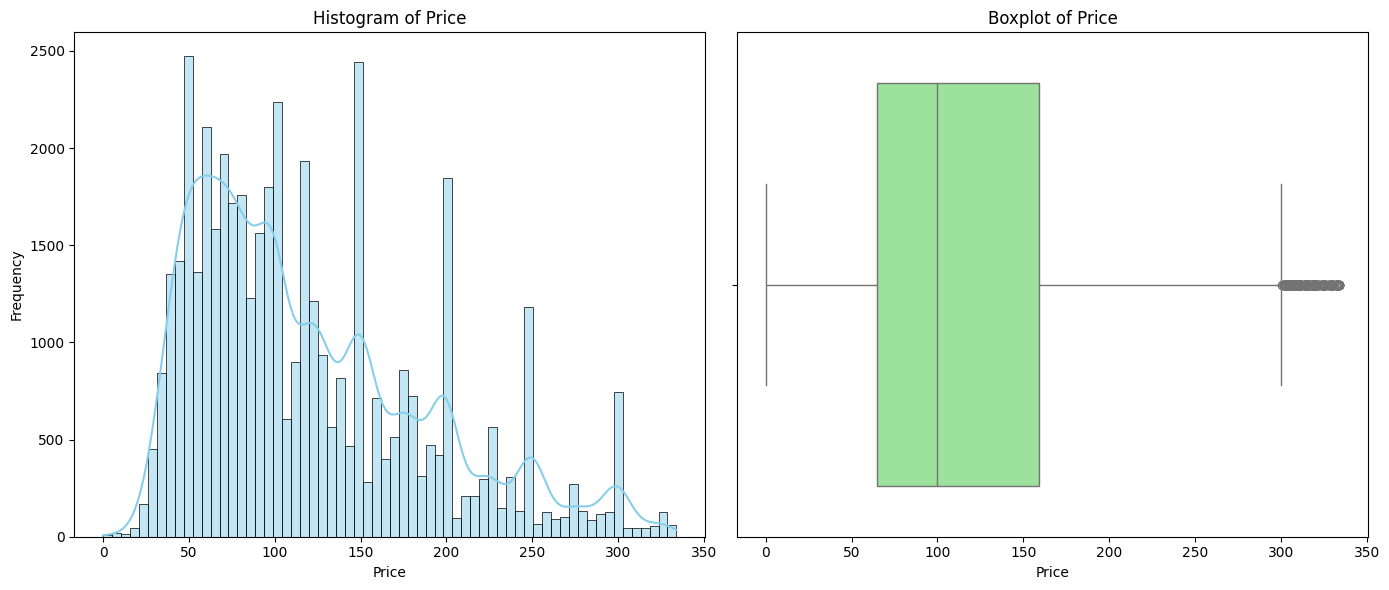

In [20]:


# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(cleaned_df['price'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=cleaned_df['price'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Price')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()


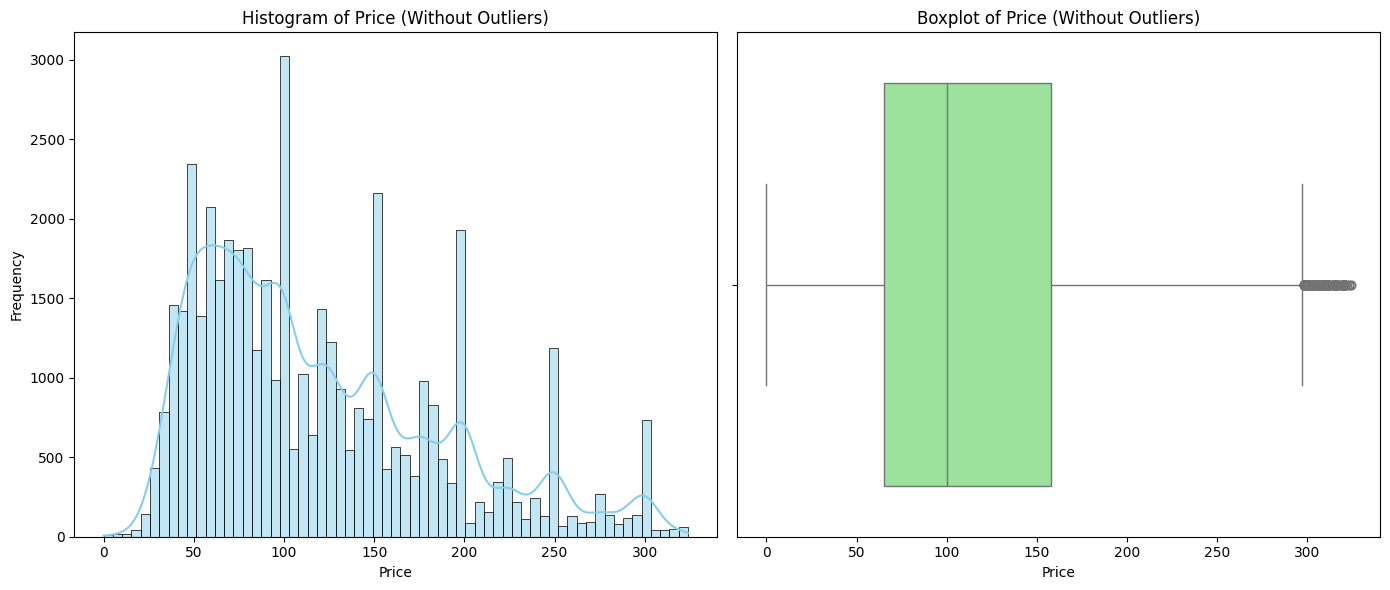

In [25]:


# Calculate Z-scores for 'price' column in the cleaned DataFrame
cleaned_df.loc[:, 'price_zscore'] = (cleaned_df['price'] - cleaned_df['price'].mean()) / cleaned_df['price'].std()

# Define threshold for outliers
threshold = 3

# Identify outliers based on Z-score
outliers = cleaned_df[(cleaned_df['price_zscore'] > threshold) | (cleaned_df['price_zscore'] < -threshold)]

# Create a new DataFrame with non-outliers
non_outliers_df = cleaned_df[(cleaned_df['price_zscore'] <= threshold) & (cleaned_df['price_zscore'] >= -threshold)]

# Plot histogram and boxplot for non-outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(non_outliers_df['price'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Histogram of Price (Without Outliers)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=non_outliers_df['price'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Price (Without Outliers)')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()
